## Mud card
- **For pd.read_csv fucntion, there are some of the arguments doing almost the same things, like header and skiprows. Is there any situation that we need to use specific one instead of either one?**
    - there might be, usually the help provides the answer
- **You tricked us a few times with common mistakes that happen e.g. leading white space, overwriting variable. How do we apply these lessons to practice? Is it just a matter of moving slowly and carefully?**
    - testing testing testing
    - if you write a piece of code, come up with a couple of ways how you will test it
    - it can be a sitution when you know work out the solution to the problem on pen and paper, maybe use a small toy dataset, print variables out
    - once you have a couple of test, only then start writing the code
    - test first, code second
- **Are left merges and right merges redundant because of symmetry? What is the point having both if you can just shift parameters on left to get the equivalent of a right merge?**
- **Why df1 is on the left and df2 on the right?**
    - they are interchangable but the merged dataframes are not exactly the same
    - try it!
    - df1.merge(df2,how='left') will contain the same rows as df2.merge(df1, how='left')
    - the order of the columns will be different so left and right merges are not redundant if you care about the order of columns (e.g., if you use .iloc)
- **When selecting a column, inputting the space before the word was a bit confusing for me. Is there a standard practice to remove the spaces from the dataset?**
    - yes, google it :) 
    - you can easily remove trailing and leading spaces
- **I wonder if there are good ways to deal with white spaces in data values. Also, how can we read a dataset that uses white spaces as separators as well as for missing values?**
    - see above and we will spend a week on missing values
- **Is there a practical reason to prefer using loc or iloc to index dataframes? Or is it just a matter of personal preference?**
- **Im interested in specific use cases where one would want to use .loc or .iloc over other forms of filtering**
    - if you work with a large dataset, you might start to worry about the time it takes to complete a filtering or some other task
    - if that happens, you want to come up with various different ways to solve the same sorting problem, measure how fast each approach is, and chose the fastest solution
    - maybe sometimes a solution that uses loc or iloc will be the fastest?
- **I am unclear about how the double columns are used in iloc/loc. For example, what exactly does df.iloc[::] does or df.iloc[::-1] does?**
    - df.iloc[::] select all rows, it is equivalent to df.iloc[start:end:stop] with start == 0, end == number of rows - 1, and step == 1 (their default values)
    - df.iloc[::-1] reverses the rows in the dataset, start == number of rows - 1, end = 0 in this case
- **I curious if there a naming strategy to avoid overwritting as much as possible.**
    - yes, do not reuse variable names :)
    - come up with a strategy that's natural for you and makes your code easy to read
- **I actually have a question regarding the last course: why do we need np.random.seed(2) to make the data reproducible?**
    - remove that line and rerun the cells a couple of times, you will see
- **Can you merge data frames and average values for ID's that occur in both data frames?**
    - I'm not sure what you mean
    - create a small toy dataset to illustrate with an example what you mean
    - post your question on Ed Discussion
- **How will we deal with NaNs in the future?**
    - we will spend a week on various methods to deal wit missing values in supervised ML
- **And will we go over how to use read_sql? Most of the data I deal with is external databases accessed via sql**
    - no becuse the exact approach (connection) depends on the type of SQL you use, but simply google how to connect to the sql you use and you will find plenty solutions
- **How would I know which .csv file that I am currently working on?**
    - you need to know your variable names and notice that df was overwritten
    - you could also write tests to check if the property of a variable changes from the ones the code encountered the first time the variable was created
- **How can we use pandas to get summary stats for each column?**
    - this is what we cover today amongst other things

# <center> Exploratory data analysis in python, part 2 </center>

# <center> Learning objectives </center>
### By the end of this lecture, you will be able to
   - visualize one column (continuous or categorical data)
   - visualize column pairs (all variations of continuous and categorical columns)
   - visualize multiple columns simultaneously

## Dataset of the day

Adult dataset, see [here](https://archive.ics.uci.edu/ml/datasets/Adult)

## Packages of the day

matplotlib and pandas

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - **visualize one column (categorical or continuous data)**
   - <font color='LIGHTGRAY'>visualize column pairs (all variations of continuous and categorical columns)</font>
   - <font color='LIGHTGRAY'>visualize multiple columns simultaneously</font>


##  Let's load the data first!

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('data/adult_data.csv')
print(df.dtypes) 

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
gross-income      object
dtype: object


### Column is continuous

In [2]:
print(df['age'].describe())

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


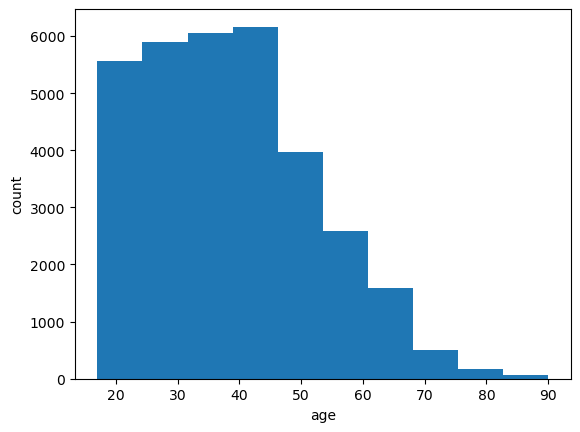

In [3]:
df['age'].plot.hist()   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

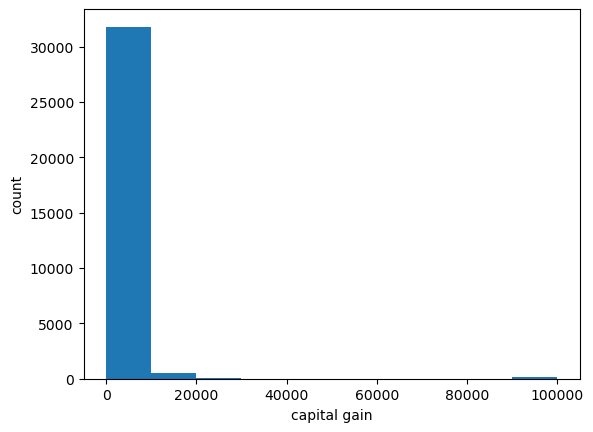

In [4]:
df['capital-gain'].plot.hist() # log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df['capital-gain'])),50)
#plt.semilogy()
#plt.semilogx()
plt.xlabel('capital gain')
plt.ylabel('count')
plt.show()

### Column is categorical

In [5]:
print(df['occupation'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


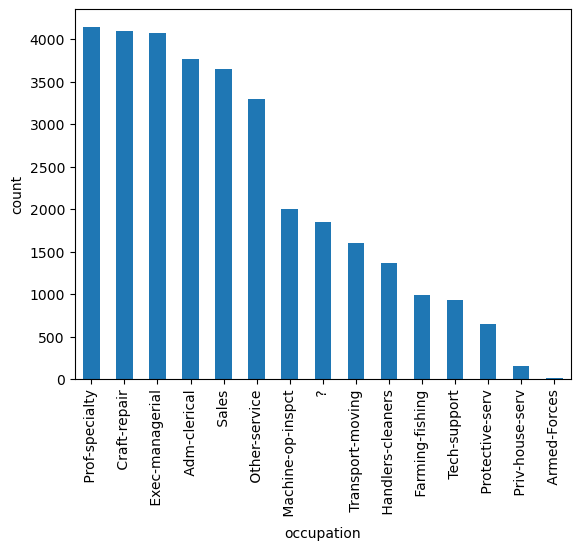

In [6]:
pd.value_counts(df['occupation']).plot.bar()
plt.ylabel('count')
plt.xlabel('occupation')
plt.show()

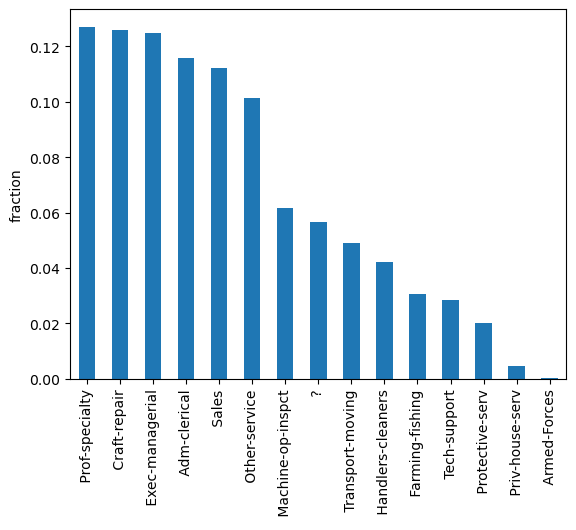

In [7]:
pd.value_counts(df['occupation'],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.show()

# Quiz 1
- What's wrong with this figure?

<center><img src="figures/quiz1.jpeg" width="600"></center>


## Ordinal features

<center><img src="figures/fig.jpeg" width="600"></center>

- other examples of ordinal features:
    - measure of quality (e.g., bad, average, good, excellent)
    - socioeconomic status (e.g., low income, middle income, high income)
    - education level (e.g., 8th grade, high school, BSc, MSc, PhD)
    - satisfaction rating (e.g., dislike, neutral, like)
    - time (e.g., days of the week, months, years)
    

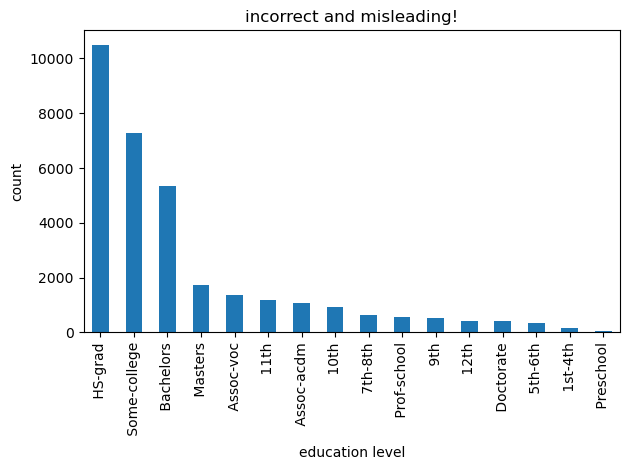

In [8]:
pd.value_counts(df['education']).plot.bar()
plt.ylabel('count')
plt.xlabel('education level')
plt.title('incorrect and misleading!')
plt.tight_layout()
plt.show()

In [9]:
pd.value_counts(df['education'])

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [10]:
correct_order = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', \
         ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc', ' Assoc-acdm', ' Bachelors',\
         ' Masters', ' Prof-school', ' Doctorate']

pd.value_counts(df['education']).reindex(correct_order)

 Preschool          51
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 10th              933
 11th             1175
 12th              433
 HS-grad         10501
 Some-college     7291
 Assoc-voc        1382
 Assoc-acdm       1067
 Bachelors        5355
 Masters          1723
 Prof-school       576
 Doctorate         413
Name: education, dtype: int64

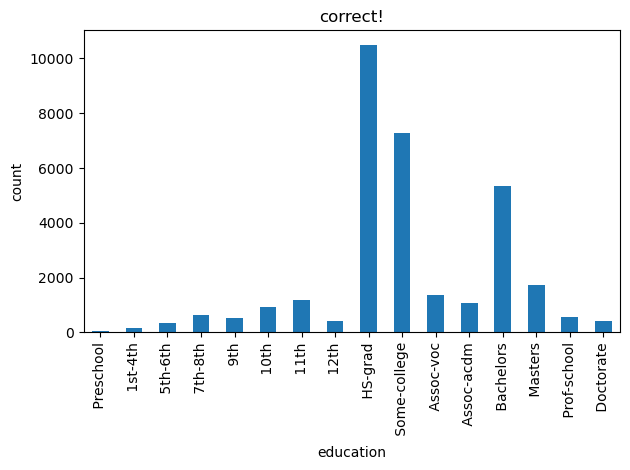

In [11]:
pd.value_counts(df['education']).reindex(correct_order).plot.bar()
plt.ylabel('count')
plt.xlabel('education')
plt.title('correct!')
plt.tight_layout()
plt.show()

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - <font color='LIGHTGRAY'>visualize one column (categorical or continuous data)</font>
   - **visualize column pairs (all variations of continuous and categorical columns)**
   - <font color='LIGHTGRAY'>visualize multiple columns simultaneously</font>


## <center> Overview </center>


| *Visualization types*        	|    column continuous    	| column categorical 	|
|---------------------	|:----------------------:	|:-----------------:	|
| __column continuous__    	| scatter plot, heatmap 	| category-specific histograms, box plot, violin plot |
| __column categorical__   	| category-specific histograms, box plot, violin plot |  stacked bar plot  	|


### Continuous vs. continuous columns
- scatter plot

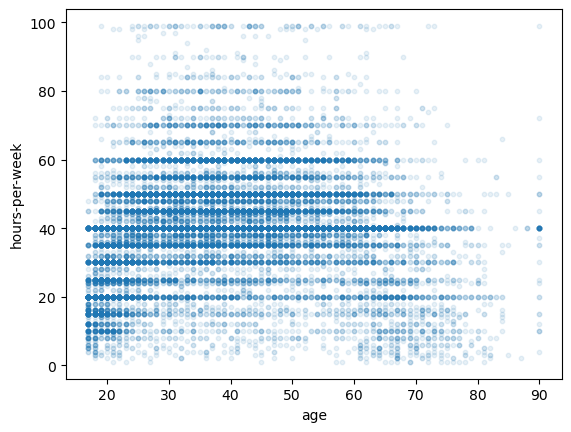

In [12]:
df.plot.scatter('age','hours-per-week',s=10,alpha=0.1) # alpha=0.1,s=10
plt.show()

### Continuous vs. continuous columns
- heatmap

In [13]:
nbins = 20

heatmap, xedges, yedges = np.histogram2d(df['age'], df['hours-per-week'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

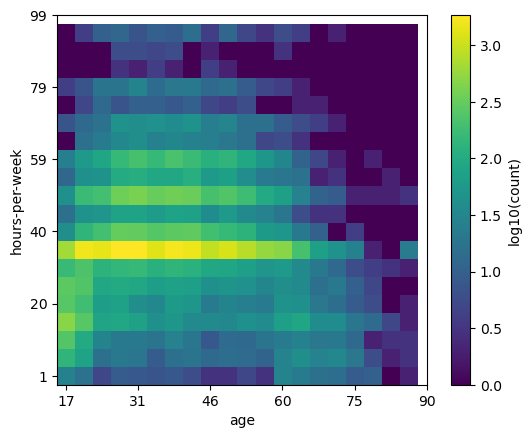

In [14]:
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

### Categorical vs. categorical columns
- stacked bar plot

In [15]:
count_matrix = df.groupby(['race', 'gross-income']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

gross-income            <=50K      >50K
race                                   
 Amer-Indian-Eskimo  0.884244  0.115756
 Asian-Pac-Islander  0.734360  0.265640
 Black               0.876120  0.123880
 Other               0.907749  0.092251
 White               0.744140  0.255860


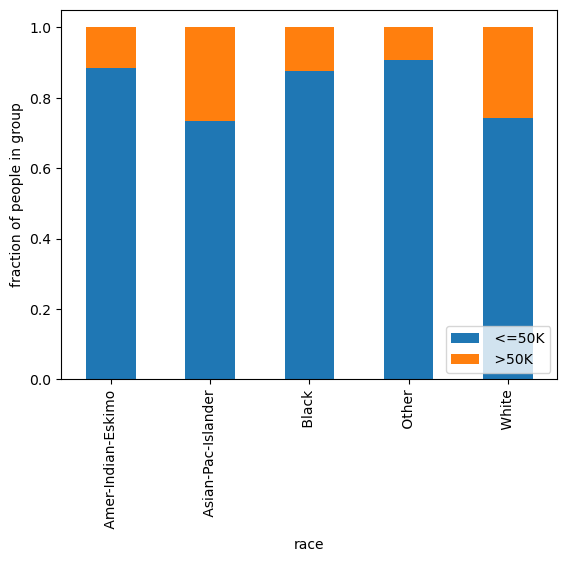

In [16]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

### Continuous vs. categorical columns
- category-specific histograms

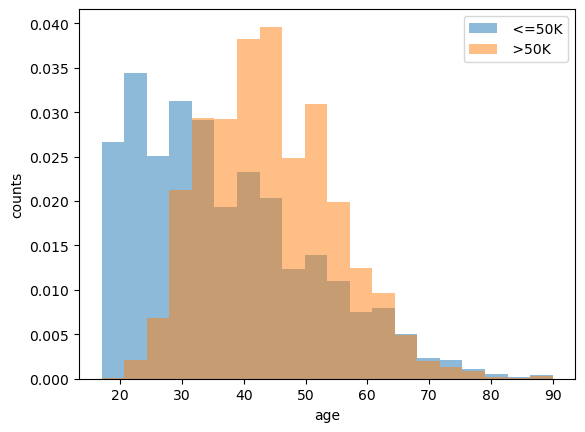

In [17]:
import matplotlib
from matplotlib import pylab as plt

categories = df['gross-income'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['gross-income']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('counts')
plt.xlabel('age')
plt.show()

### Continuous vs. categorical columns
- box plot

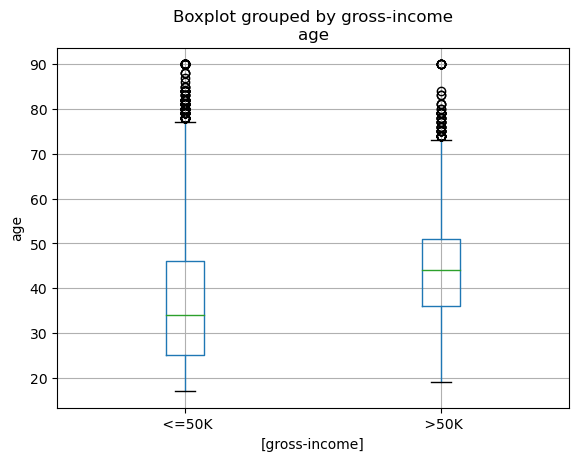

In [18]:
df[['age','gross-income']].boxplot(by='gross-income')
plt.ylabel('age')
plt.show()

### Continuous vs. categorical columns
- violin plot

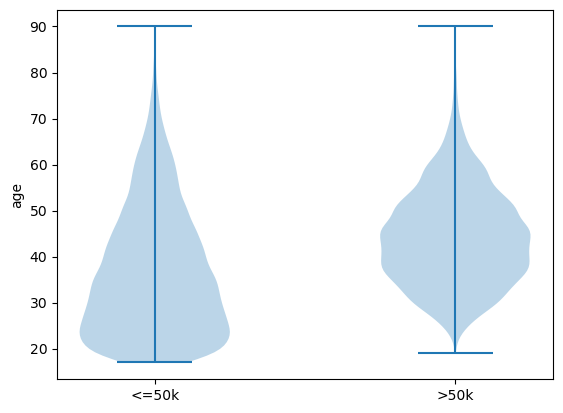

In [19]:
dataset = [df[df['gross-income']==' <=50K']['age'].values,
           df[df['gross-income']==' >50K']['age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=50k','>50k'])
plt.ylabel('age')
plt.show()

## Quiz 2
Pair the column name(s) with the appropriate visualization type!

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - <font color='LIGHTGRAY'>visualize one column (categorical or continuous data)</font>
   - <font color='LIGHTGRAY'>visualize column pairs (all variations of continuous and categorical columns)</font>
   - **visualize multiple columns simultaneously**

#### Scatter matrix

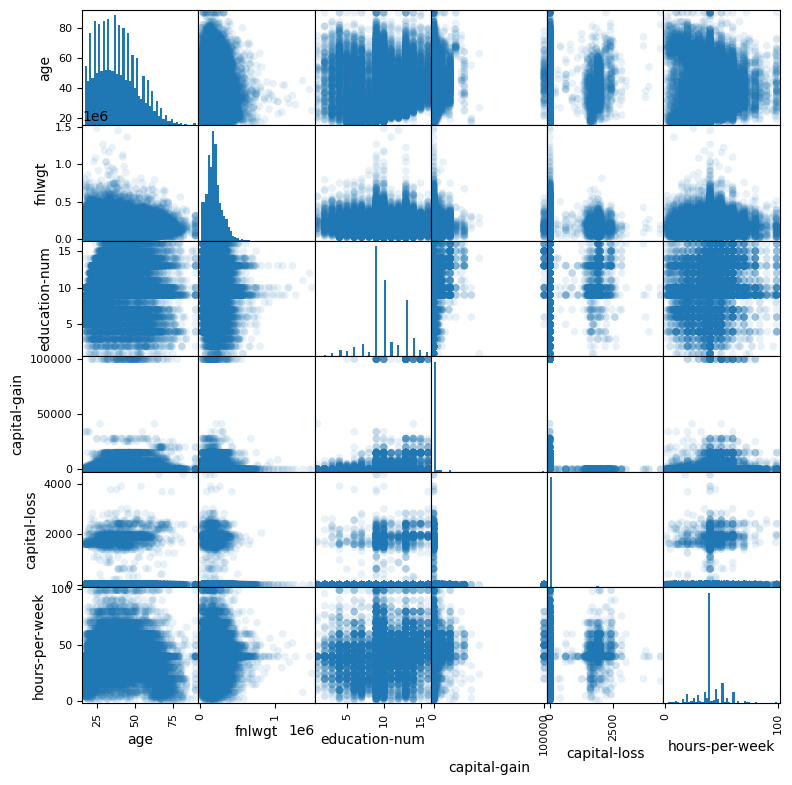

In [20]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

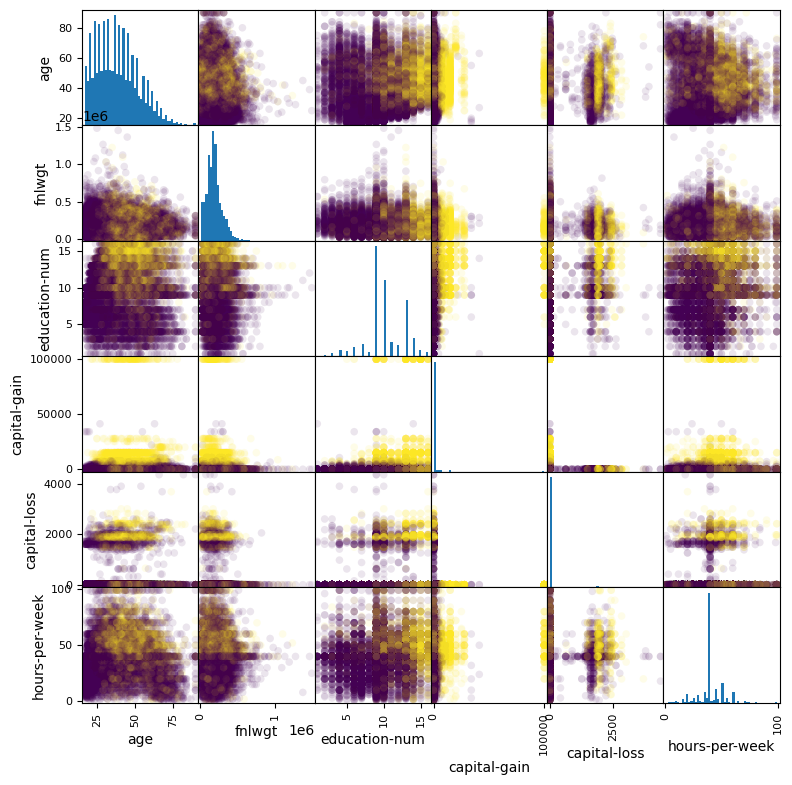

In [21]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9),c = pd.get_dummies(df['gross-income']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.show()

### By now, you can
   - visualize one column (continuous or categorical data)
   - visualize column pairs (all variations of continuous and categorical columns)
   - visualize multiple columns simultaneously

## [Matplotlib cheatsheets!](https://github.com/matplotlib/cheatsheets)

The cheatsheets in this repo are excellent. Feel free to use them any time!

## Other great resources for visualization

https://www.data-to-viz.com/

https://pyviz.org/

# Mud card